### Helpers (Packages and Functions)

In [1]:
#Packages for NLP
import pickle
import numpy as np
from tqdm import tqdm
import pandas as pd
import json
import string
import nltk
from nltk.corpus import stopwords
from  nltk import FreqDist
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import spacy
from textblob import TextBlob
from textblob import Word
from wordcloud import WordCloud, ImageColorGenerator
import warnings
warnings.filterwarnings('ignore')

nlp = spacy.load("en_core_web_sm")

In [4]:
#Define stopwords
punctuation = "".join([symbol for symbol in string.punctuation if symbol not in ["'", '"']])
punctuation += '–'

stopwords_list = stopwords.words('english')
stopwords_list += list(punctuation)
stopwords_list += ['yeah','yea','uh','wo','yo','yeah!','ain\'t','i\'m']

In [5]:
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# Functions for cleaning

In [6]:
def concat_songs(list_lyrics):
    combo = ' '.join(lyric for lyric in list_lyrics)
    return combo

In [7]:
def get_tokens(songs, remove_stop_words=True):
    """Splits a string of text into individual words"""
    #remove stop words
    stop_words = set(stopwords_list) if remove_stop_words else []
    #tokenize
    words = [x for x in songs.split() if x not in stop_words]
    words = ['Nword' if x in ['nigga', 'niggas','n*gga','n*ggas'] else x for x in words]
    words = ['Fword' if x in ['fuck', 'fucking','fuckin','fuckin\'','fucker','motherfucker','motherfucking'] else x for x in words]
    words = ['Bword' if x in ['bitch', 'ho','hoes','b*tch'] else x for x in words]
    return words

In [8]:
#replace in' with ing
def replace_contraction(list_lyrics):
    result = []
    for lyric in list_lyrics:
        result.append(lyric.replace("in\'","ing"))
    return result

In [9]:
def lem_words(list_of_tokens,pos): 
    wrd_list = [Word(word).lemmatize(pos=pos) for word in list_of_tokens]
    # join the individual lemmas into a single string
    return wrd_list

In [111]:
#function to create wordcloud
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [11]:
#Function to create the correlation heatmap
def CorrMtx(df, dropDuplicates = True):

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(12, 8))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
        plt.xticks(rotation = 90)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
        plt.xticks(rotation = 90)

## Importing DFs

In [12]:
#Load in a Dataframe all lyrics and artist names
tracks_df = pd.read_pickle('../Data-Cleaning-EDA/working_data.pkl')

In [13]:
print(tracks_df.shape)
tracks_df.head()

(27514, 31)


Artist               Title  \
1  DJ Jazzy Jeff & The Fresh Prince       Time to Chill   
3                 Machine Gun Kelly               Candy   
4                           Big Pun  You Ain’t a Killer   
6                           Das EFX           Buck-Buck   
9                      Kool Moe Dee   To the Beat Y’all   

                         Album        Year  \
1  He’s The DJ, I’m The Rapper  1988-03-29   
3                 Hotel Diablo  2019-07-05   
4           Capital Punishment  1998-04-28   
6                 Hold It Down  1995-09-26   
9           Funke Funke Wisdom  1991-06-11   

                                              Lyrics  \
1  [Fresh Prince]\nFor years I have been waitin a...   
3  [Intro: Trippie Redd]\nHaha, Big 14, you know ...   
4  [Verse 1]\nThe harsh realities of life have ta...   
6  *Skoob and Dray giving shoutouts*\n\nChorus:\n...   
9  To the beat...\n\n(To the beat y'all\nTo the b...   

                         name duration_ms popularity num_markets  \
1               Time to Chill      266040         24          79   
3  Candy (feat. Trippie Redd)      156719         78          79   
4          You Ain't a Killer      254866         57          79   
6                   Buck-Buck      193626         22          78   
9           To The Beat Y'All      201266         11          77   

                                   album  ... acousticness instrumentalness  \
1            He's The DJ, I'm The Rapper  ...      0.00172         0.000020   
3                           Hotel Diablo  ...      0.00829         0.000000   
4  Capital Punishment (Explicit Version)  ...      0.13400         0.000000   
6                           Hold It Down  ...      0.29300         0.000000   
9                    Funke, Funke Wisdom  ...      0.01930         0.000107   

  liveness valence    tempo  time_signature  Year_release  \
1   0.0648   0.887  170.385               4          1988   
3   0.1820   0.480   98.019               4          2019   
4   0.1120   0.745   90.945               4          1998   
6   0.2950   0.531   95.677               4          1995   
9   0.3950   0.578  108.597               4          1991   

                                      Cleaned_lyrics  \
1  for years i have been waitin and hesitatin to ...   
3  haha big 14 you know what the fuck going on   ...   
4  the harsh realities of life have taken toll ev...   
6  skoob and dray giving shoutouts  chorus  well ...   
9  to the beat  to the beat y'all to the beat y'a...   

                                         Lyric_words Language  
1  [for, years, i, have, been, waitin, and, hesit...       en  
3  [haha, big, 14, you, know, what, the, fuck, go...       en  
4  [the, harsh, realities, of, life, have, taken,...       en  
6  [skoob, and, dray, giving, shoutouts, chorus, ...       en  
9  [to, the, beat, to, the, beat, y'all, to, the,...       en  

[5 rows x 31 columns]

In [14]:
#Load in a Dataframe all lyrics by artist names
artists_df = pd.read_pickle('../Data-Cleaning-EDA/artist_data.pkl')

In [15]:
print(artists_df.shape)
artists_df.head()

(277, 3)


Artist                                     Cleaned_lyrics  Number_songs
0   2 Chainz  [i go hard in the mother fuckin' kitchen half ...           158
1  21 Savage  [in my feelin's she got me in my feelin's she ...            58
2       2Pac  [yo c'mon man what do you mean you don't wanna...           191
3    50 Cent  [i can hear your heartbeat you're scared yeah ...           158
4  A$AP Ferg  [at 7 am i wake up hit the green i hit my teet...            59

In [16]:
#Load in a Dataframe all lyrics by release year
year_df = pd.read_pickle('../Data-Cleaning-EDA/year_data.pkl')

In [17]:
print(year_df.shape)
year_df.head()

(32, 3)


Year_release                                     Cleaned_lyrics  \
10         1988  [for years i have been waitin and hesitatin to...   
11         1989  [yo this one aight though yo me and cool v dis...   
12         1990  [ah and we do it like this ah and we do it lik...   
13         1991  [to the beat  to the beat y'all to the beat y'...   
14         1992  [hello is anybody out there alright well check...   

    Number_songs  
10            87  
11           118  
12           104  
13           182  
14           159

## EDA for artists

### Features engineering

In [ ]:
#plan
#total words for each artist
#unique words for each artist
#words frequency
#word clouts
#words per songs average
#unique words per songs
#TF-IDF
#LDA

In [18]:
#create a column with all the lyrics
artists_df['all_Lyrics'] = artists_df.Cleaned_lyrics.apply(lambda x: concat_songs(x))

In [19]:
artists_df.head()

Artist                                     Cleaned_lyrics  Number_songs  \
0   2 Chainz  [i go hard in the mother fuckin' kitchen half ...           158   
1  21 Savage  [in my feelin's she got me in my feelin's she ...            58   
2       2Pac  [yo c'mon man what do you mean you don't wanna...           191   
3    50 Cent  [i can hear your heartbeat you're scared yeah ...           158   
4  A$AP Ferg  [at 7 am i wake up hit the green i hit my teet...            59   

                                          all_Lyrics  
0  i go hard in the mother fuckin' kitchen half t...  
1  in my feelin's she got me in my feelin's she g...  
2  yo c'mon man what do you mean you don't wanna ...  
3  i can hear your heartbeat you're scared yeah y...  
4  at 7 am i wake up hit the green i hit my teeth...

In [21]:
#tokenize the lyrics
# artists_df['tokens_w_stpw'] = artists_df.all_Lyrics.apply(lambda x: get_tokens(x,remove_stop_words=False))
artists_df['tokens_w_out_stpw'] = artists_df.all_Lyrics.apply(lambda x: get_tokens(x,remove_stop_words=True))

In [22]:
artists_df.head()

Artist                                     Cleaned_lyrics  Number_songs  \
0   2 Chainz  [i go hard in the mother fuckin' kitchen half ...           158   
1  21 Savage  [in my feelin's she got me in my feelin's she ...            58   
2       2Pac  [yo c'mon man what do you mean you don't wanna...           191   
3    50 Cent  [i can hear your heartbeat you're scared yeah ...           158   
4  A$AP Ferg  [at 7 am i wake up hit the green i hit my teet...            59   

                                          all_Lyrics  \
0  i go hard in the mother fuckin' kitchen half t...   
1  in my feelin's she got me in my feelin's she g...   
2  yo c'mon man what do you mean you don't wanna ...   
3  i can hear your heartbeat you're scared yeah y...   
4  at 7 am i wake up hit the green i hit my teeth...   

                                   tokens_w_out_stpw  
0  [go, hard, mother, Fword, kitchen, half, thing...  
1  [feelin's, got, feelin's, got, feelin's, forre...  
2  [c'mon, man, mean, wanna, ride, Nword, c'mon, ...  
3  [hear, heartbeat, scared, hear, heartbeat, sca...  
4  [7, wake, hit, green, hit, teeth, listerine, p...

In [23]:
#replace in' with ing and remove 's
# artists_df['tokens_w_stpw'] = artists_df.tokens_w_stpw.apply(lambda x: replace_contraction(x))
artists_df['tokens_w_out_stpw'] = artists_df.tokens_w_out_stpw.apply(lambda x: replace_contraction(x))

In [24]:
artists_df.head()

Artist                                     Cleaned_lyrics  Number_songs  \
0   2 Chainz  [i go hard in the mother fuckin' kitchen half ...           158   
1  21 Savage  [in my feelin's she got me in my feelin's she ...            58   
2       2Pac  [yo c'mon man what do you mean you don't wanna...           191   
3    50 Cent  [i can hear your heartbeat you're scared yeah ...           158   
4  A$AP Ferg  [at 7 am i wake up hit the green i hit my teet...            59   

                                          all_Lyrics  \
0  i go hard in the mother fuckin' kitchen half t...   
1  in my feelin's she got me in my feelin's she g...   
2  yo c'mon man what do you mean you don't wanna ...   
3  i can hear your heartbeat you're scared yeah y...   
4  at 7 am i wake up hit the green i hit my teeth...   

                                   tokens_w_out_stpw  
0  [go, hard, mother, Fword, kitchen, half, thing...  
1  [feelings, got, feelings, got, feelings, forre...  
2  [c'mon, man, mean, wanna, ride, Nword, c'mon, ...  
3  [hear, heartbeat, scared, hear, heartbeat, sca...  
4  [7, wake, hit, green, hit, teeth, listerine, p...

In [25]:
#Lemmatize verbs and nouns
# artists_df['tokens_stpw_lemma'] = artists_df.tokens_w_stpw.apply(lambda x: lem_words(x,'n'))
artists_df['tokens_no_stpw_lemma'] = artists_df.tokens_w_out_stpw.apply(lambda x: lem_words(x,'n'))

In [26]:
# artists_df['tokens_stpw_lemma'] = artists_df.tokens_stpw_lemma.apply(lambda x: lem_words(x,'v'))
artists_df['tokens_no_stpw_lemma'] = artists_df.tokens_no_stpw_lemma.apply(lambda x: lem_words(x,'v'))

In [27]:
artists_df.head()

Artist                                     Cleaned_lyrics  Number_songs  \
0   2 Chainz  [i go hard in the mother fuckin' kitchen half ...           158   
1  21 Savage  [in my feelin's she got me in my feelin's she ...            58   
2       2Pac  [yo c'mon man what do you mean you don't wanna...           191   
3    50 Cent  [i can hear your heartbeat you're scared yeah ...           158   
4  A$AP Ferg  [at 7 am i wake up hit the green i hit my teet...            59   

                                          all_Lyrics  \
0  i go hard in the mother fuckin' kitchen half t...   
1  in my feelin's she got me in my feelin's she g...   
2  yo c'mon man what do you mean you don't wanna ...   
3  i can hear your heartbeat you're scared yeah y...   
4  at 7 am i wake up hit the green i hit my teeth...   

                                   tokens_w_out_stpw  \
0  [go, hard, mother, Fword, kitchen, half, thing...   
1  [feelings, got, feelings, got, feelings, forre...   
2  [c'mon, man, mean, wanna, ride, Nword, c'mon, ...   
3  [hear, heartbeat, scared, hear, heartbeat, sca...   
4  [7, wake, hit, green, hit, teeth, listerine, p...   

                                tokens_no_stpw_lemma  
0  [go, hard, mother, Fword, kitchen, half, thing...  
1  [feel, get, feel, get, feel, forreal, get, fee...  
2  [c'mon, man, mean, wanna, ride, Nword, c'mon, ...  
3  [hear, heartbeat, scar, hear, heartbeat, scar,...  
4  [7, wake, hit, green, hit, teeth, listerine, p...

In [28]:
#count the words for the entire lyrics
# artists_df['Count_words_w_stpw'] = artists_df.tokens_stpw_lemma.apply(lambda x: len(x))
artists_df['Count_words_no_stpw'] = artists_df.tokens_no_stpw_lemma.apply(lambda x: len(x))

In [29]:
#count of unique words used per artists
# artists_df['Unique_words_w_stpw'] = artists_df.tokens_stpw_lemma.apply(lambda x: len(set(x)))
artists_df['Unique_words_no_stpw'] = artists_df.tokens_no_stpw_lemma.apply(lambda x: len(set(x)))

In [30]:
#Replace name of artist with $ sign
artists_df['Artist_Name'] = artists_df.Artist.apply(lambda x: x.replace('$','S'))

In [31]:
#average words used per each artist
artists_df['Avg_words'] = artists_df.Count_words_no_stpw/artists_df.Number_songs

In [32]:
artists_df.head()

Artist                                     Cleaned_lyrics  Number_songs  \
0   2 Chainz  [i go hard in the mother fuckin' kitchen half ...           158   
1  21 Savage  [in my feelin's she got me in my feelin's she ...            58   
2       2Pac  [yo c'mon man what do you mean you don't wanna...           191   
3    50 Cent  [i can hear your heartbeat you're scared yeah ...           158   
4  A$AP Ferg  [at 7 am i wake up hit the green i hit my teet...            59   

                                          all_Lyrics  \
0  i go hard in the mother fuckin' kitchen half t...   
1  in my feelin's she got me in my feelin's she g...   
2  yo c'mon man what do you mean you don't wanna ...   
3  i can hear your heartbeat you're scared yeah y...   
4  at 7 am i wake up hit the green i hit my teeth...   

                                   tokens_w_out_stpw  \
0  [go, hard, mother, Fword, kitchen, half, thing...   
1  [feelings, got, feelings, got, feelings, forre...   
2  [c'mon, man, mean, wanna, ride, Nword, c'mon, ...   
3  [hear, heartbeat, scared, hear, heartbeat, sca...   
4  [7, wake, hit, green, hit, teeth, listerine, p...   

                                tokens_no_stpw_lemma  Count_words_no_stpw  \
0  [go, hard, mother, Fword, kitchen, half, thing...                42683   
1  [feel, get, feel, get, feel, forreal, get, fee...                18428   
2  [c'mon, man, mean, wanna, ride, Nword, c'mon, ...                72835   
3  [hear, heartbeat, scar, hear, heartbeat, scar,...                45969   
4  [7, wake, hit, green, hit, teeth, listerine, p...                18815   

   Unique_words_no_stpw Artist_Name   Avg_words  
0                  5543    2 Chainz  270.145570  
1                  2461   21 Savage  317.724138  
2                  6201        2Pac  381.335079  
3                  5445     50 Cent  290.943038  
4                  3292   ASAP Ferg  318.898305

In [33]:
#unique words taking in account number of songs
artists_df['Avg_uniq_words'] = artists_df.Unique_words_no_stpw/artists_df.Number_songs

In [34]:
#save data frame
with open('../Data-Cleaning-EDA/cleaned_artist_data.pkl', 'wb') as file:
    pickle.dump(artists_df, file)

### Graphs

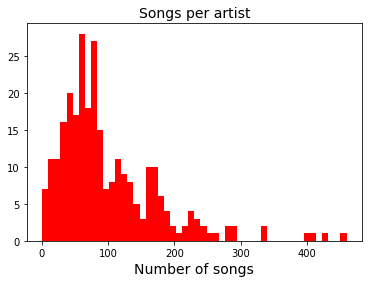

In [35]:
# How many songs do I have for each artist in initial DF?
plt.hist(artists_df.Number_songs,bins=50,color = 'r')
plt.xlabel("Number of songs", fontsize=14)
plt.title("Songs per artist", fontsize=14)
plt.show()

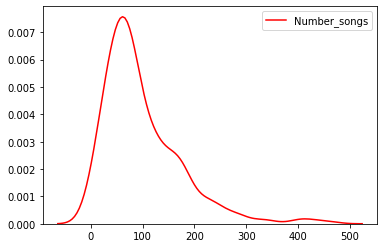

In [36]:
sns.kdeplot(artists_df.Number_songs, color = 'r')
plt.show()

In [37]:
#removing artist with more than 300 songs
artists_df = artists_df[artists_df['Number_songs']<= 300]

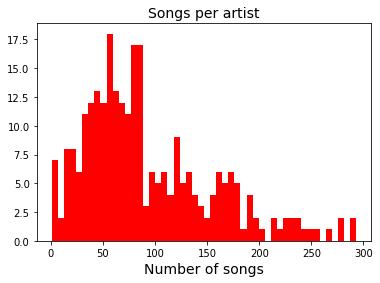

In [38]:
# How many songs do I have for each artist after removing outliers?
plt.hist(artists_df.Number_songs,bins=50,color = 'r')
plt.xlabel("Number of songs", fontsize=14)
plt.title("Songs per artist", fontsize=14)
plt.show()

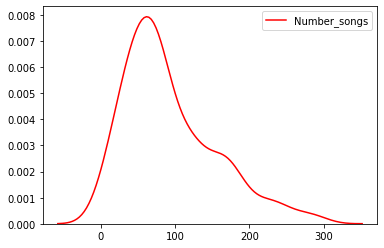

In [39]:
sns.kdeplot(artists_df.Number_songs, color = 'r')
plt.show()

In [ ]:
artists_df.sort_values(by = 'Count_words_no_stpw',ascending=False).head(25)

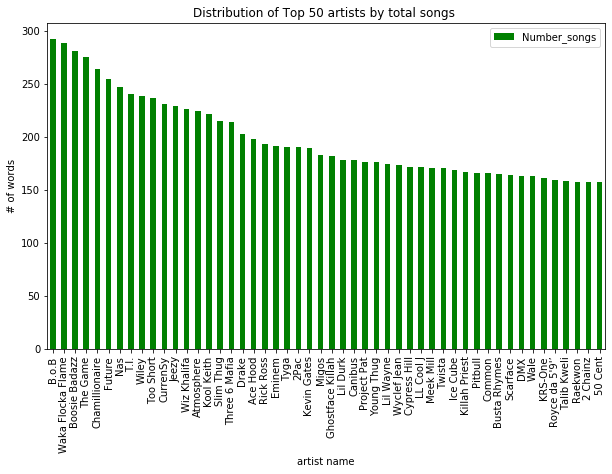

In [40]:
# Create and label an histogram for artists indicators

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
artists_df.sort_values(by = 'Number_songs',ascending=False).head(50).set_index('Artist_Name')['Number_songs'].plot(kind='bar', ax=axes,color='green')
axes.set_title('Distribution of Top 50 artists by total songs ')
axes.set_xlabel("artist name")
axes.set_ylabel("# of words")
axes.legend()
plt.show()

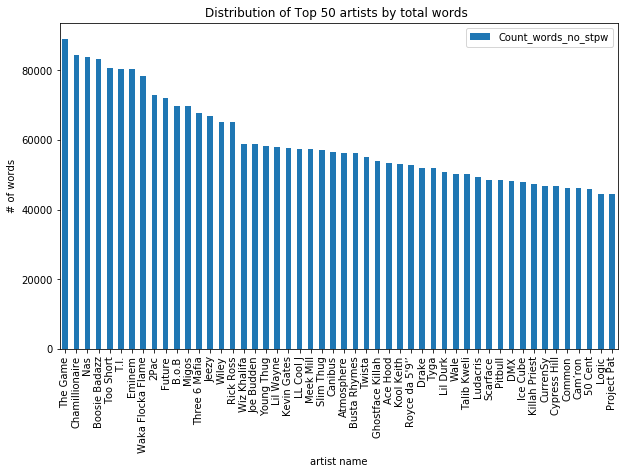

In [41]:
# Create and label an histogram for artists indicators

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

artists_df.sort_values(by = 'Count_words_no_stpw',ascending=False).head(50).set_index('Artist_Name')['Count_words_no_stpw'].plot(kind='bar', ax=axes)

axes.set_title('Distribution of Top 50 artists by total words ')
axes.set_xlabel("artist name")
axes.set_ylabel("# of words")
axes.legend()
plt.show()

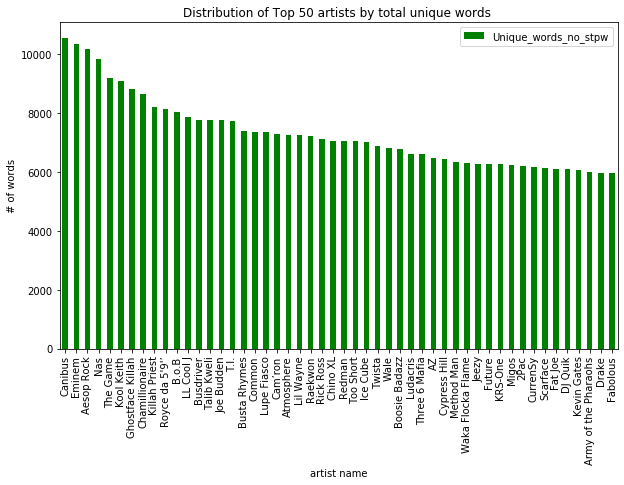

In [42]:
# Create and label an histogram for artists indicators

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

artists_df.sort_values(by = 'Unique_words_no_stpw',ascending=False).head(50).set_index('Artist_Name')['Unique_words_no_stpw'].plot(kind='bar', ax=axes,color='green')
axes.set_title('Distribution of Top 50 artists by total unique words ')
axes.set_xlabel("artist name")
axes.set_ylabel("# of words")
axes.legend()
plt.show()

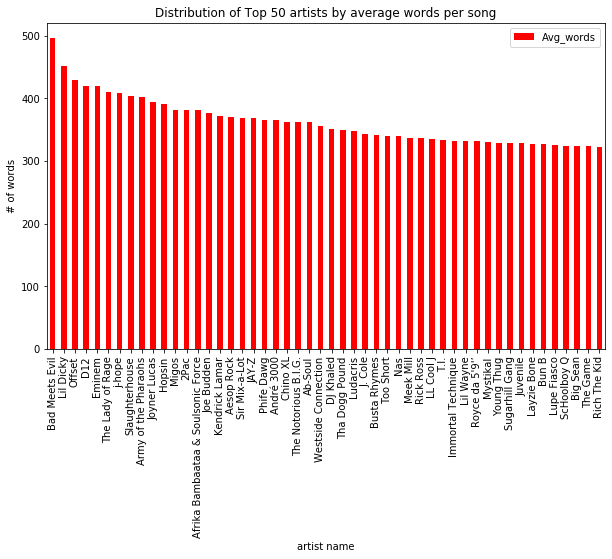

In [43]:
# Create and label an histogram for artists indicators

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

artists_df.sort_values(by = 'Avg_words',ascending=False).head(50).set_index('Artist_Name')['Avg_words'].plot(kind='bar', ax=axes,color='red')
axes.set_title('Distribution of Top 50 artists by average words per song')
axes.set_xlabel("artist name")
axes.set_ylabel("# of words")
axes.legend()
plt.show()

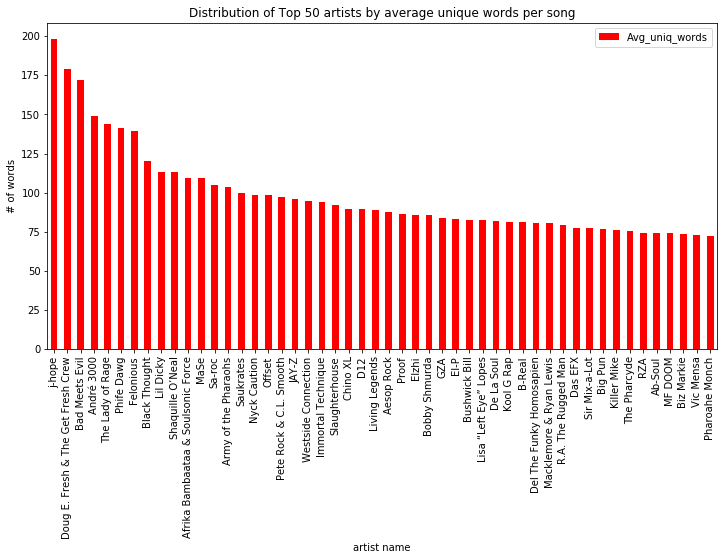

In [44]:
# Create and label an histogram for artists indicators

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,6))

artists_df.sort_values(by = 'Avg_uniq_words',ascending=False).head(50).set_index('Artist_Name')['Avg_uniq_words'].plot(kind='bar', ax=axes,color='red')
axes.set_title('Distribution of Top 50 artists by average unique words per song')
axes.set_xlabel("artist name")
axes.set_ylabel("# of words")
axes.legend()
plt.show()

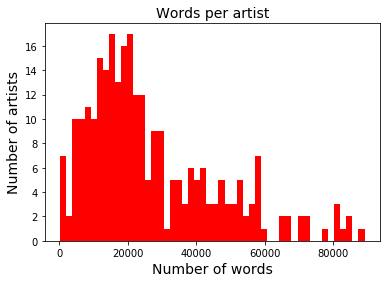

In [45]:
# total words for each artist?
plt.hist(artists_df.Count_words_no_stpw,50,color = 'r')
plt.xlabel("Number of words", fontsize=14)
plt.ylabel("Number of artists", fontsize=14)
plt.title("Words per artist", fontsize=14)
plt.show()

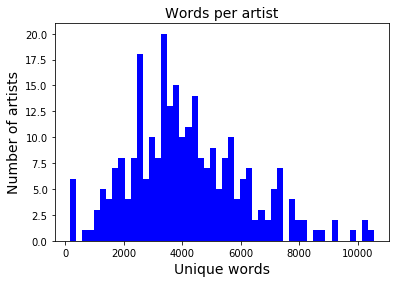

In [46]:
# unique words per artist
plt.hist(artists_df.Unique_words_no_stpw,50,color = 'b')
plt.xlabel("Unique words", fontsize=14)
plt.ylabel("Number of artists", fontsize=14)
plt.title("Words per artist", fontsize=14)
plt.show()

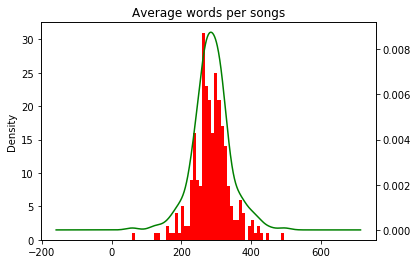

In [47]:
#Showing the distribution of total unique words used
artists_df.Avg_words.plot(kind='hist',color='r',bins=50)
artists_df.Avg_words.plot(kind='kde', secondary_y=True,color='green')
plt.title('Average words per songs')
plt.show()

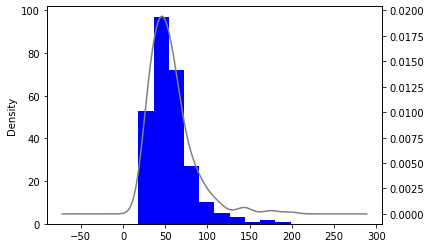

In [48]:
#Showing the distribution of average unique words used
artists_df.Avg_uniq_words.plot(kind='hist',color='blue')
artists_df.Avg_uniq_words.plot(kind='kde', secondary_y=True,color='gray')

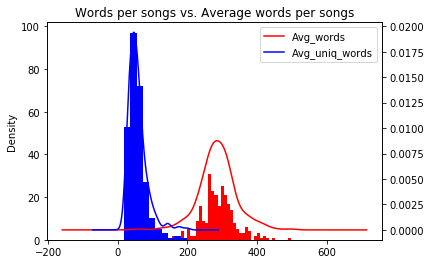

In [50]:
#words per songs vs. unique words
artists_df.Avg_words.plot(kind='hist',color='r',bins=50)
artists_df.Avg_words.plot(kind='kde', secondary_y=True,color='red')
artists_df.Avg_uniq_words.plot(kind='hist',color='blue')
artists_df.Avg_uniq_words.plot(kind='kde', secondary_y=True,color='blue')
plt.title('Words per songs vs. Average words per songs')
plt.legend()
plt.show()

In [68]:
artists_df.head(1)

Artist                                     Cleaned_lyrics  Number_songs  \
0  2 Chainz  [i go hard in the mother fuckin' kitchen half ...           158   

                                          all_Lyrics  \
0  i go hard in the mother fuckin' kitchen half t...   

                                   tokens_w_out_stpw  \
0  [go, hard, mother, Fword, kitchen, half, thing...   

                                tokens_no_stpw_lemma  Count_words_no_stpw  \
0  [go, hard, mother, Fword, kitchen, half, thing...                42683   

   Unique_words_no_stpw Artist_Name  Avg_words  Avg_uniq_words  
0                  5543    2 Chainz  270.14557       35.082278

In [80]:
lyrics = list(artists_df.tokens_no_stpw_lemma)

In [81]:
len(lyrics)

271

In [82]:
lyrics[0]

['go',
 'hard',
 'mother',
 'Fword',
 'kitchen',
 'half',
 'thing',
 'whole',
 'thing',
 'Nword',
 'pitchin',
 'hit',
 'soda',
 'make',
 'Nword',
 'start',
 'whip',
 'hit',
 'choppa',
 'make',
 'Nword',
 'start',
 'flip',
 'go',
 'hard',
 'mother',
 'Fword',
 'kitchen',
 'half',
 'thing',
 'whole',
 'thing',
 'Nword',
 'pitchin',
 'hit',
 'soda',
 'make',
 'Nword',
 'start',
 'whip',
 'hit',
 'choppa',
 'make',
 'Nword',
 'start',
 'flip',
 'go',
 'hard',
 'mother',
 'Fword',
 'kitchen',
 'use',
 'baby',
 'bottle',
 'lean',
 'wifey',
 'say',
 'trippin',
 'plus',
 'get',
 'maybelline',
 'smear',
 'right',
 'zipper',
 'i’m',
 'kama',
 'sutra',
 'reader',
 'conjure',
 'drinker',
 'hot',
 'stave',
 'smoke',
 'like',
 'reefer',
 'work',
 'ain’t',
 'bout',
 'shit',
 'that’s',
 'cheaper',
 'Bword',
 'ain’t',
 'bout',
 'shit',
 'that’s',
 'cheaper',
 'blow',
 'strong',
 'that’s',
 'weaker',
 'wait',
 'status',
 'change',
 'weight',
 'wait',
 'meal',
 'already',
 'put',
 'plate',
 'Nword',
 'fa

In [83]:
all_lyrics = []
for lyric in lyrics:
    for token in lyric:
        all_lyrics.append(token)

In [84]:
len(all_lyrics)

7221497

In [85]:
all_lyrics[:4]

['go', 'hard', 'mother', 'Fword']

In [86]:
lyrics_words=concat_songs(all_lyrics)

In [87]:
lyrics_words[:21]

'go hard mother Fword '

In [ ]:
# Generate a word cloud image
wordcloud = WordCloud(max_font_size=40,background_color='black').generate_from_text(str(all_lyrics))
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

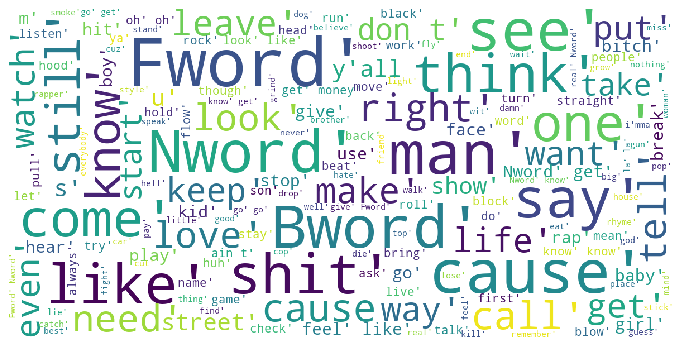

In [112]:
show_wordcloud(lyrics)

In [113]:
#find the words frequency for all lyrics
freq_w = nltk.FreqDist(all_lyrics)

In [114]:
len(freq_w)

125586

In [115]:
#find the 50 most frequent words
most_freq = freq_w.most_common(50)
most_freq

[('get', 186817),
 ('like', 119139),
 ('Nword', 118920),
 ('know', 80519),
 ('go', 65595),
 ('Fword', 62818),
 ('Bword', 50158),
 ('make', 49083),
 ('shit', 48933),
 ('say', 46787),
 ('see', 45645),
 ('come', 43378),
 ('back', 39033),
 ('one', 35822),
 ('take', 34066),
 ('love', 33111),
 ('tell', 32506),
 ('time', 31581),
 ('man', 31573),
 ("that's", 30113),
 ('want', 29439),
 ('never', 28939),
 ('wanna', 28244),
 ('let', 28180),
 ("can't", 26883),
 ('ya', 26826),
 ('think', 26786),
 ('money', 26621),
 ('cause', 26325),
 ('keep', 26064),
 ('look', 25551),
 ('right', 24866),
 ('feel', 23948),
 ('baby', 23894),
 ('give', 23632),
 ("'em", 23431),
 ('way', 22427),
 ('put', 22124),
 ('life', 22029),
 ('girl', 22024),
 ('need', 21987),
 ('still', 19631),
 ('try', 19507),
 ('real', 19401),
 ('gotta', 19119),
 ('hit', 18657),
 ('talk', 18421),
 ('call', 18374),
 ('oh', 17934),
 ('day', 17558)]

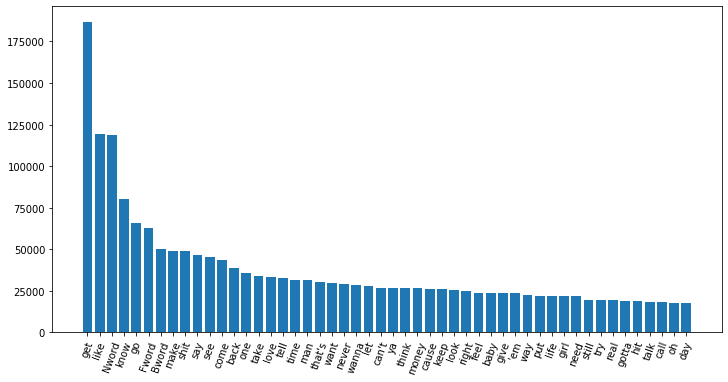

In [116]:
#Visualize the most frequent words
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
plt.bar(range(len(most_freq)), [val[1] for val in most_freq], align='center')
plt.xticks(range(len(most_freq)), [val[0] for val in most_freq])
plt.xticks(rotation=70)
plt.show()

In [ ]:
from os import path
from PIL import Image
import os

In [ ]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

In [ ]:
hiphop_mask = np.array(Image.open(path.join(d, "hip-hop-graph.jpg")))
wc = WordCloud(background_color="white", max_words=2000, mask=hiphop_mask,
               stopwords=stopwords_list, contour_width=3, contour_color='black')

# generate word cloud
wc.generate(lyrics_words)

# store to file
wc.to_file(path.join(d, "test.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(hiphop_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

## EDA for years

### Features engineering

In [117]:
year_df.head()

Year_release                                     Cleaned_lyrics  \
10         1988  [for years i have been waitin and hesitatin to...   
11         1989  [yo this one aight though yo me and cool v dis...   
12         1990  [ah and we do it like this ah and we do it lik...   
13         1991  [to the beat  to the beat y'all to the beat y'...   
14         1992  [hello is anybody out there alright well check...   

    Number_songs  
10            87  
11           118  
12           104  
13           182  
14           159

In [ ]:
#plan
#total words for year
#unique words for year
#words frequency
#word clouts
#words per songs average
#unique words per songs
#TF-IDF
#LDA

In [118]:
#create a column with all the lyrics
year_df['all_Lyrics'] = year_df.Cleaned_lyrics.apply(lambda x: concat_songs(x))

In [119]:
year_df.head()

Year_release                                     Cleaned_lyrics  \
10         1988  [for years i have been waitin and hesitatin to...   
11         1989  [yo this one aight though yo me and cool v dis...   
12         1990  [ah and we do it like this ah and we do it lik...   
13         1991  [to the beat  to the beat y'all to the beat y'...   
14         1992  [hello is anybody out there alright well check...   

    Number_songs                                         all_Lyrics  
10            87  for years i have been waitin and hesitatin to ...  
11           118  yo this one aight though yo me and cool v dis ...  
12           104  ah and we do it like this ah and we do it like...  
13           182  to the beat  to the beat y'all to the beat y'a...  
14           159  hello is anybody out there alright well check ...

In [120]:
#tokenize the lyrics
# year_df['tokens_w_stpw'] = year_df.all_Lyrics.apply(lambda x: get_tokens(x,remove_stop_words=False))
year_df['tokens_w_out_stpw'] = year_df.all_Lyrics.apply(lambda x: get_tokens(x,remove_stop_words=True))

In [121]:
#replace in' with ing
# year_df['tokens_w_stpw'] = year_df.tokens_w_stpw.apply(lambda x: replace_contraction(x))
year_df['tokens_w_out_stpw'] = year_df.tokens_w_out_stpw.apply(lambda x: replace_contraction(x))


In [122]:
#Lemmatize verbs and nouns
# year_df['tokens_stpw_lemma'] = year_df.tokens_w_stpw.apply(lambda x: lem_words(x,'n'))
year_df['tokens_no_stpw_lemma'] = year_df.tokens_w_out_stpw.apply(lambda x: lem_words(x,'n'))
# year_df['tokens_stpw_lemma'] = year_df.tokens_stpw_lemma.apply(lambda x: lem_words(x,'v'))
year_df['tokens_no_stpw_lemma'] = year_df.tokens_no_stpw_lemma.apply(lambda x: lem_words(x,'v'))


In [123]:
year_df.head()

Year_release                                     Cleaned_lyrics  \
10         1988  [for years i have been waitin and hesitatin to...   
11         1989  [yo this one aight though yo me and cool v dis...   
12         1990  [ah and we do it like this ah and we do it lik...   
13         1991  [to the beat  to the beat y'all to the beat y'...   
14         1992  [hello is anybody out there alright well check...   

    Number_songs                                         all_Lyrics  \
10            87  for years i have been waitin and hesitatin to ...   
11           118  yo this one aight though yo me and cool v dis ...   
12           104  ah and we do it like this ah and we do it like...   
13           182  to the beat  to the beat y'all to the beat y'a...   
14           159  hello is anybody out there alright well check ...   

                                    tokens_w_out_stpw  \
10  [years, waitin, hesitatin, make, rap, record, ...   
11  [one, aight, though, cool, v, dis, dis, dis, g...   
12  [ah, like, ah, like, ah, like, ah, like, days,...   
13  [beat, beat, y'all, beat, y'all, beat, y'all, ...   
14  [hello, anybody, alright, well, check, cordial...   

                                 tokens_no_stpw_lemma  
10  [year, waitin, hesitatin, make, rap, record, p...  
11  [one, aight, though, cool, v, dis, dis, dis, g...  
12  [ah, like, ah, like, ah, like, ah, like, day, ...  
13  [beat, beat, y'all, beat, y'all, beat, y'all, ...  
14  [hello, anybody, alright, well, check, cordial...

In [124]:
#count the words for the entire lyrics
# year_df['Count_words_w_stpw'] = year_df.tokens_stpw_lemma.apply(lambda x: len(x))
year_df['Count_words_no_stpw'] = year_df.tokens_no_stpw_lemma.apply(lambda x: len(x))


In [125]:
#count of unique words used per year
# year_df['Unique_words_w_stpw'] = year_df.tokens_stpw_lemma.apply(lambda x: len(set(x)))
year_df['Unique_words_no_stpw'] = year_df.tokens_no_stpw_lemma.apply(lambda x: len(set(x)))


In [126]:
#average words used per year
year_df['Avg_words'] = year_df.Count_words_no_stpw/year_df.Number_songs


In [127]:
#unique words taking in account number of songs
year_df['Avg_uniq_words'] = year_df.Unique_words_no_stpw/year_df.Number_songs

In [128]:
year_df.head()

Year_release                                     Cleaned_lyrics  \
10         1988  [for years i have been waitin and hesitatin to...   
11         1989  [yo this one aight though yo me and cool v dis...   
12         1990  [ah and we do it like this ah and we do it lik...   
13         1991  [to the beat  to the beat y'all to the beat y'...   
14         1992  [hello is anybody out there alright well check...   

    Number_songs                                         all_Lyrics  \
10            87  for years i have been waitin and hesitatin to ...   
11           118  yo this one aight though yo me and cool v dis ...   
12           104  ah and we do it like this ah and we do it like...   
13           182  to the beat  to the beat y'all to the beat y'a...   
14           159  hello is anybody out there alright well check ...   

                                    tokens_w_out_stpw  \
10  [years, waitin, hesitatin, make, rap, record, ...   
11  [one, aight, though, cool, v, dis, dis, dis, g...   
12  [ah, like, ah, like, ah, like, ah, like, days,...   
13  [beat, beat, y'all, beat, y'all, beat, y'all, ...   
14  [hello, anybody, alright, well, check, cordial...   

                                 tokens_no_stpw_lemma  Count_words_no_stpw  \
10  [year, waitin, hesitatin, make, rap, record, p...                26713   
11  [one, aight, though, cool, v, dis, dis, dis, g...                38650   
12  [ah, like, ah, like, ah, like, ah, like, day, ...                30130   
13  [beat, beat, y'all, beat, y'all, beat, y'all, ...                48621   
14  [hello, anybody, alright, well, check, cordial...                49347   

    Unique_words_no_stpw   Avg_words  Avg_uniq_words  
10                  5054  307.045977       58.091954  
11                  6610  327.542373       56.016949  
12                  5386  289.711538       51.788462  
13                  7278  267.148352       39.989011  
14                  8222  310.358491       51.710692

In [138]:
#save data frame
with open('../Data-Cleaning-EDA/cleaned_year_data.pkl', 'wb') as file:
    pickle.dump(year_df, file)

### graphs

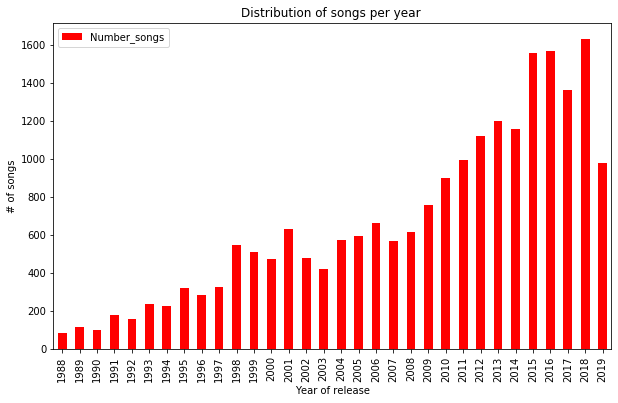

In [130]:
# How many songs do I have each year?

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

year_df.set_index('Year_release')['Number_songs'].plot(kind='bar', ax=axes,color='r')
axes.set_title('Distribution of songs per year ')
axes.set_xlabel("Year of release")
axes.set_ylabel("# of songs")
axes.legend()
plt.show()

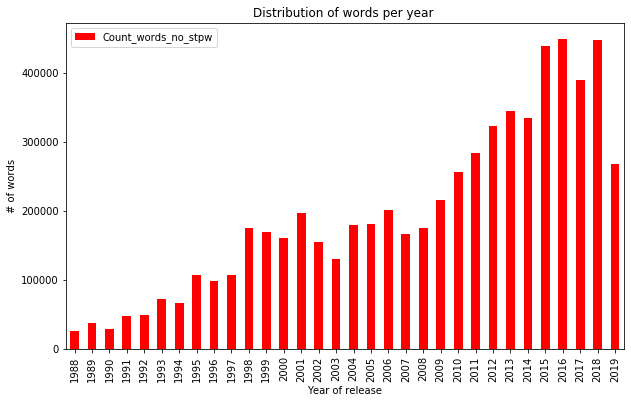

In [131]:
# How many words do I have each year?

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

year_df.set_index('Year_release')['Count_words_no_stpw'].plot(kind='bar', ax=axes,color='r')
axes.set_title('Distribution of words per year ')
axes.set_xlabel("Year of release")
axes.set_ylabel("# of words")
axes.legend()
plt.show()

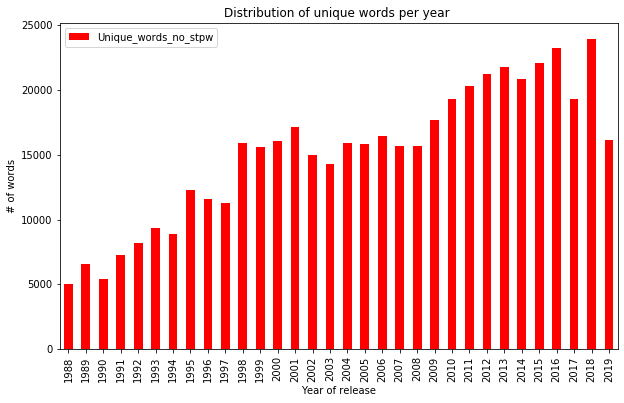

In [132]:
# How many unique words do I have each year?

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

year_df.set_index('Year_release')['Unique_words_no_stpw'].plot(kind='bar', ax=axes,color='r')
axes.set_title('Distribution of unique words per year ')
axes.set_xlabel("Year of release")
axes.set_ylabel("# of words")
axes.legend()
plt.show()

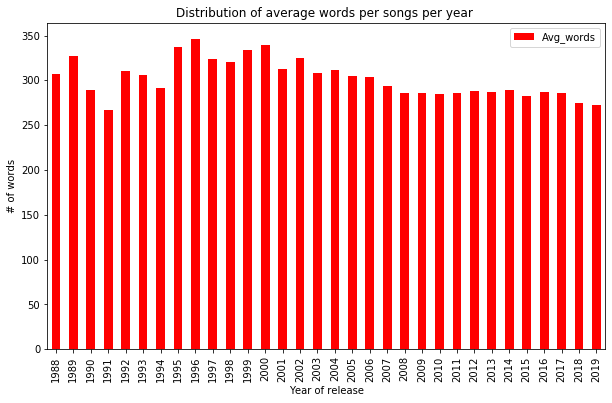

In [133]:
# avg words each year?

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

year_df.set_index('Year_release')['Avg_words'].plot(kind='bar', ax=axes,color='r')
axes.set_title('Distribution of average words per songs per year ')
axes.set_xlabel("Year of release")
axes.set_ylabel("# of words")
axes.legend()
plt.show()

In [134]:
#ANOVA


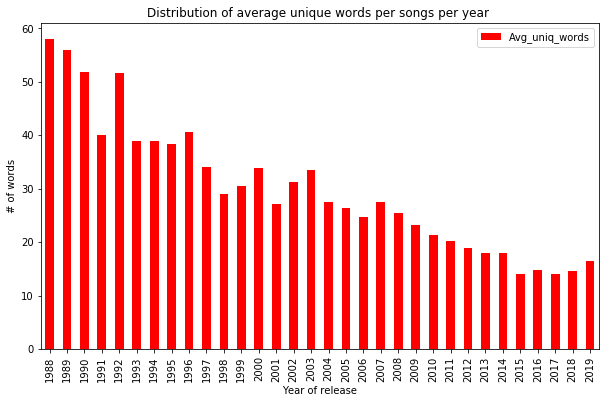

In [135]:
# avg unique words each year?

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

year_df.set_index('Year_release')['Avg_uniq_words'].plot(kind='bar', ax=axes,color='r')
axes.set_title('Distribution of average unique words per songs per year ')
axes.set_xlabel("Year of release")
axes.set_ylabel("# of words")
axes.legend()
plt.show()

In [136]:
# Words used going down. is it because of streaming?

In [ ]:
#word cloud per year

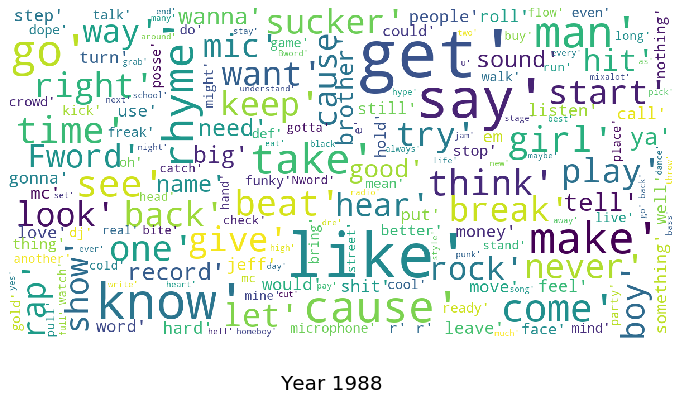

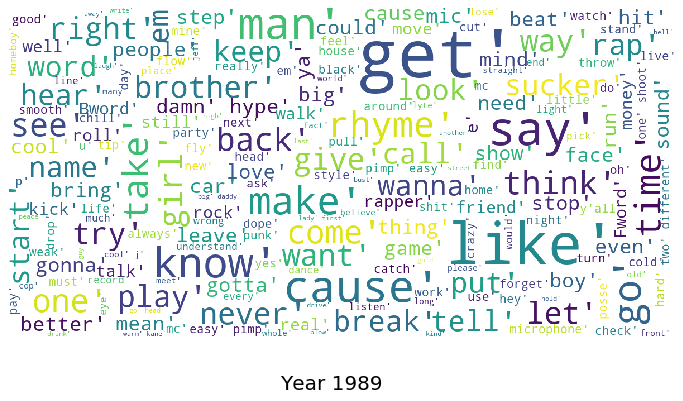

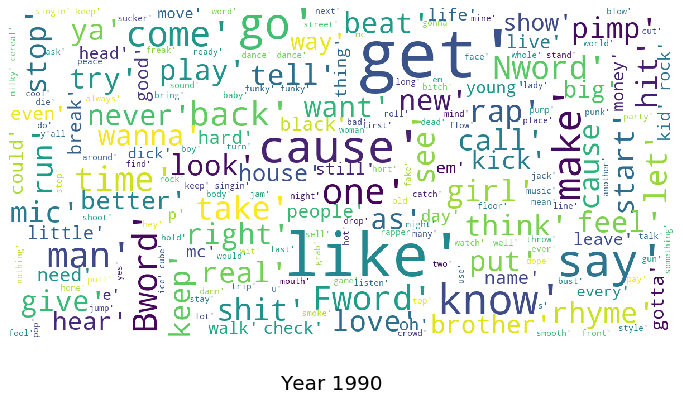

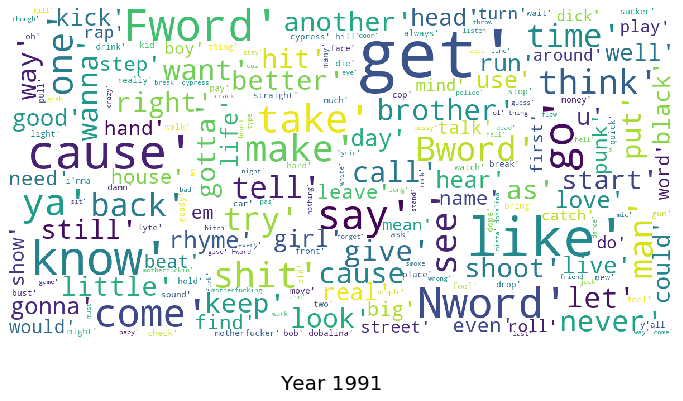

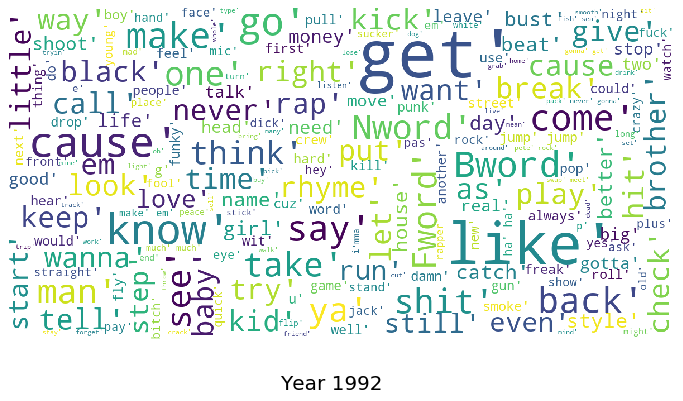

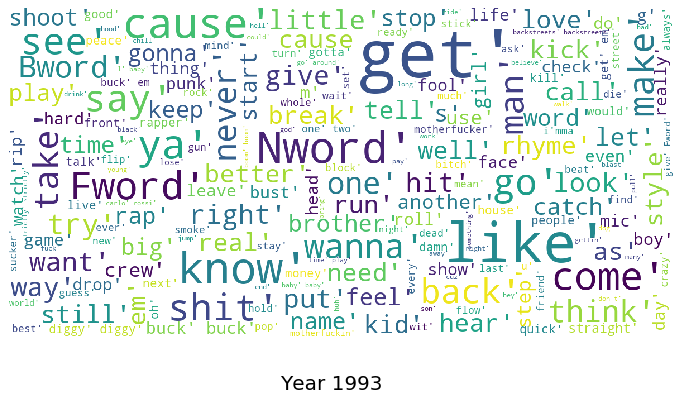

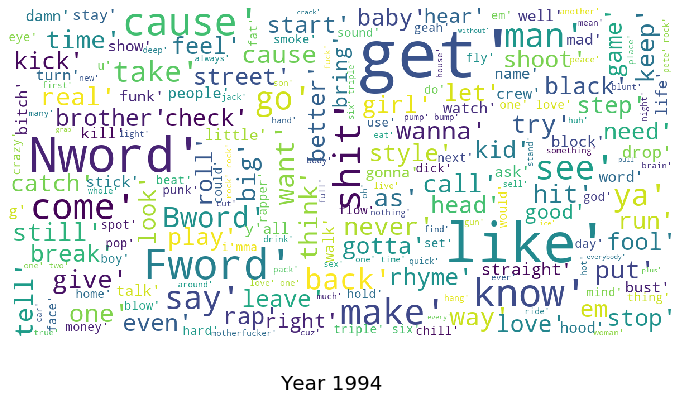

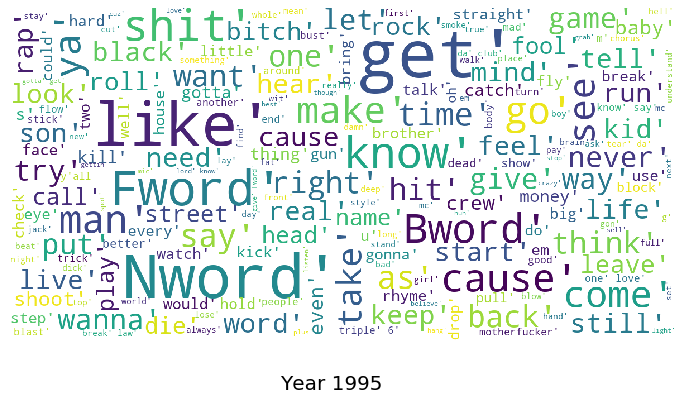

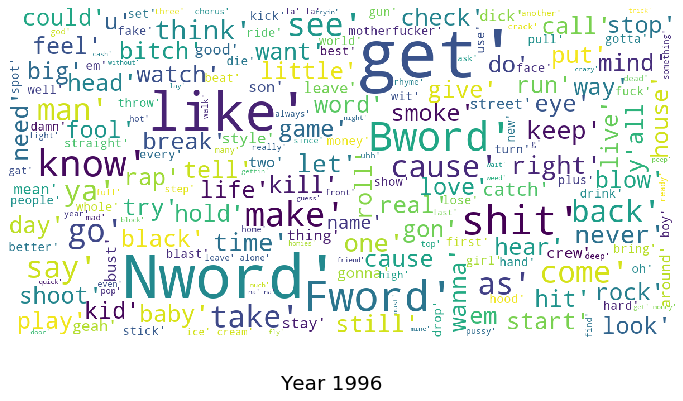

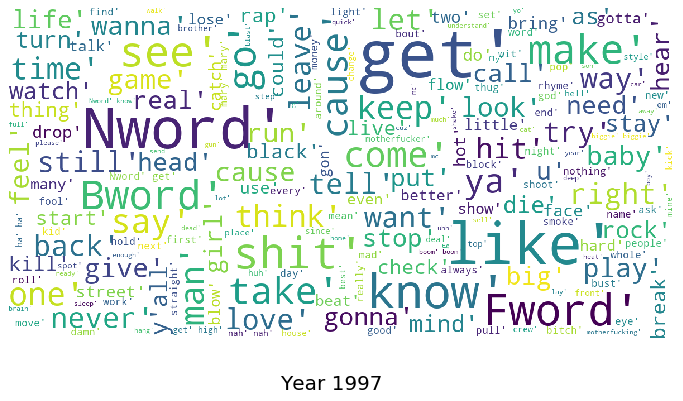

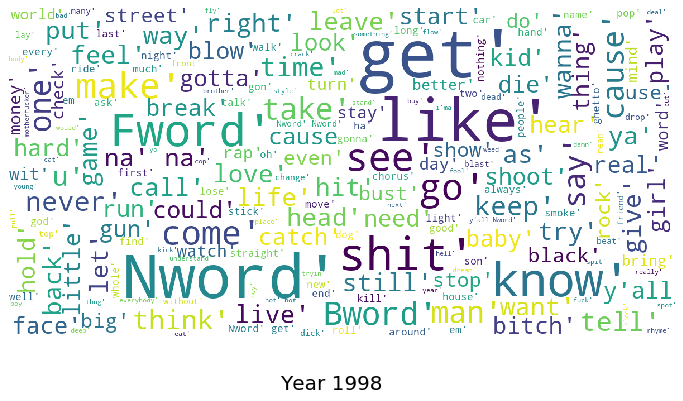

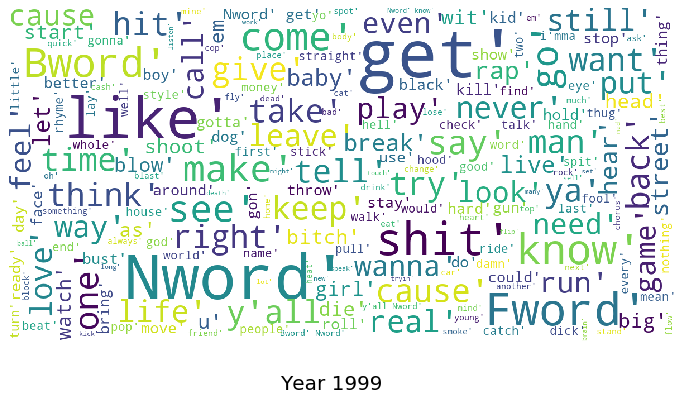

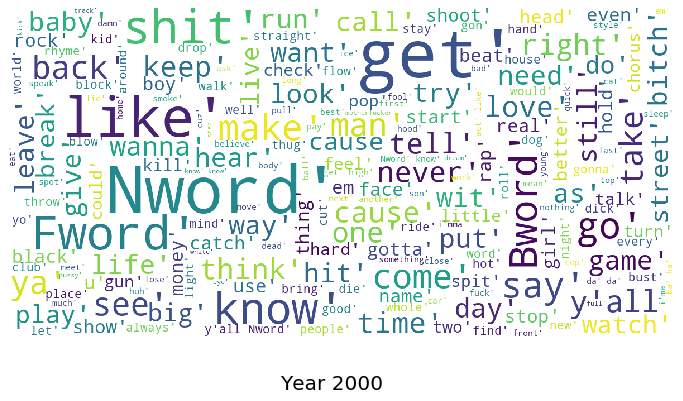

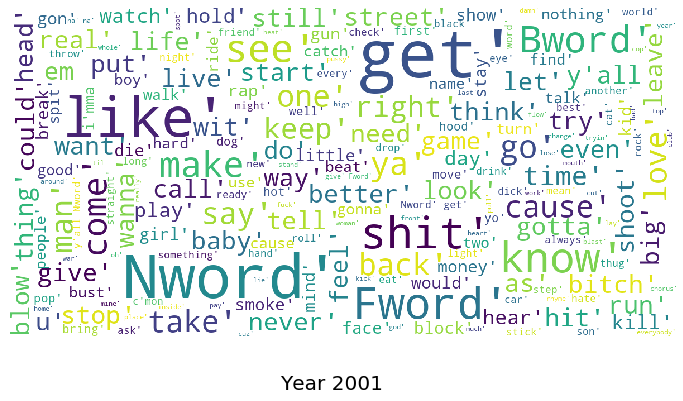

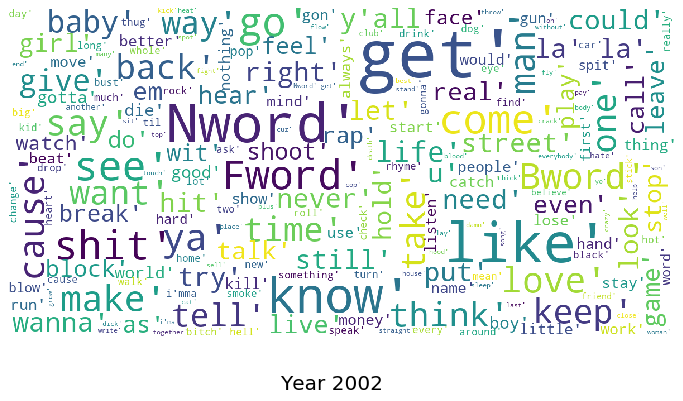

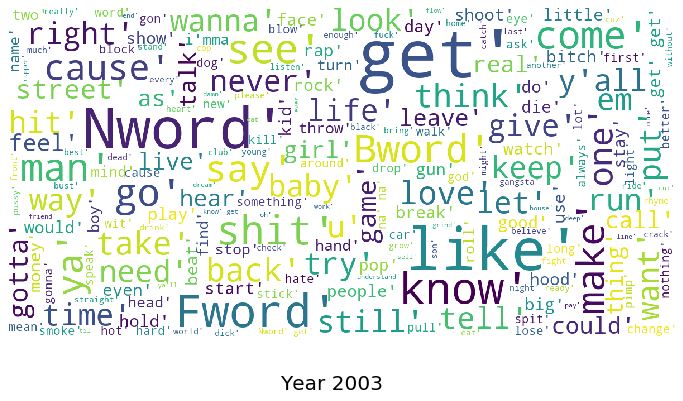

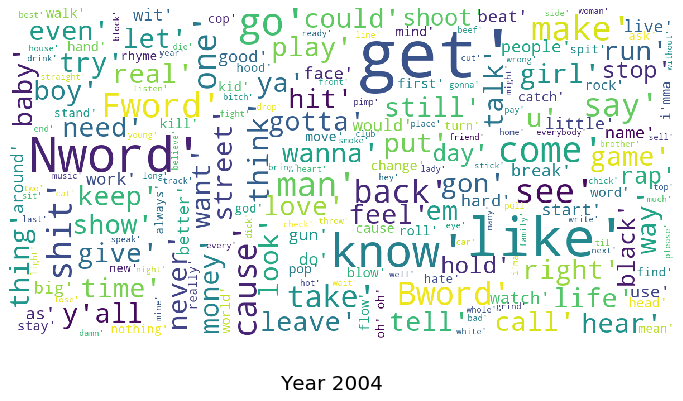

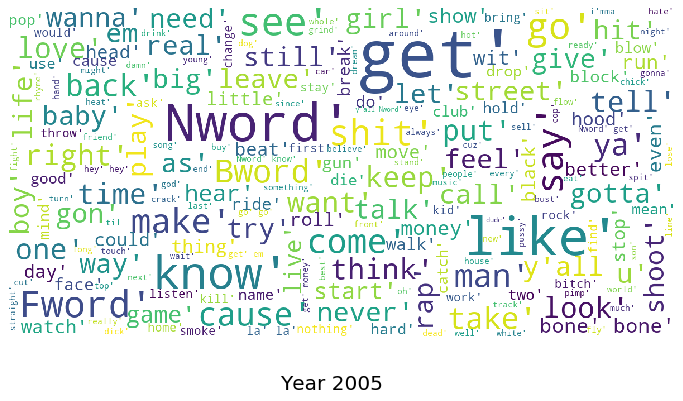

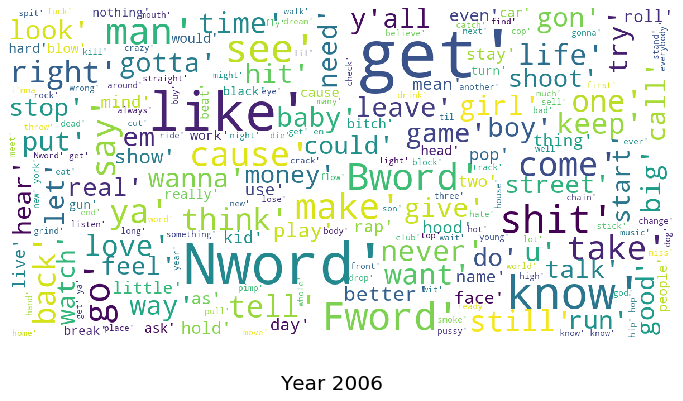

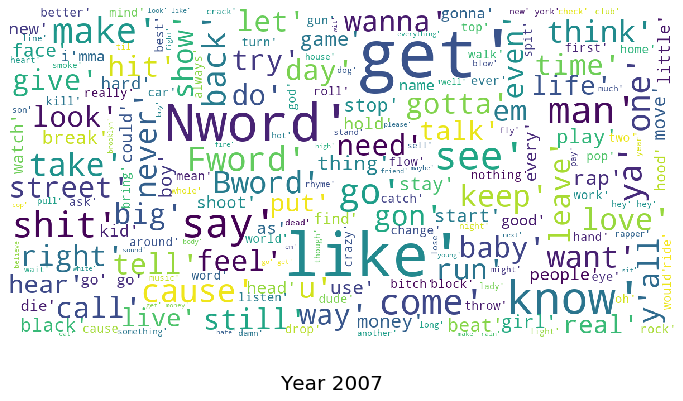

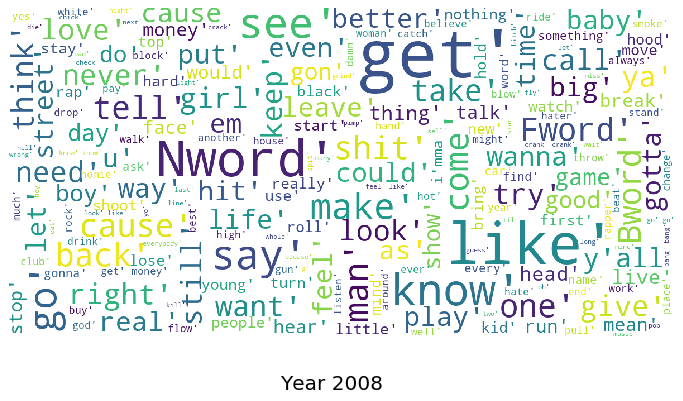

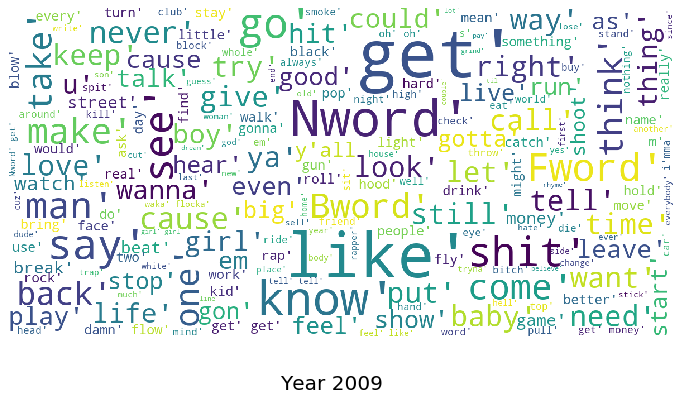

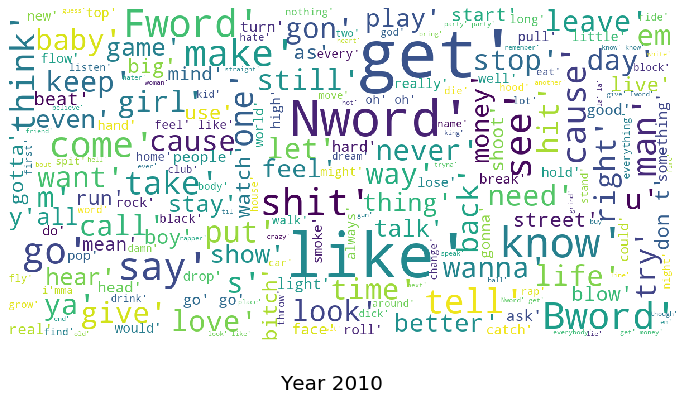

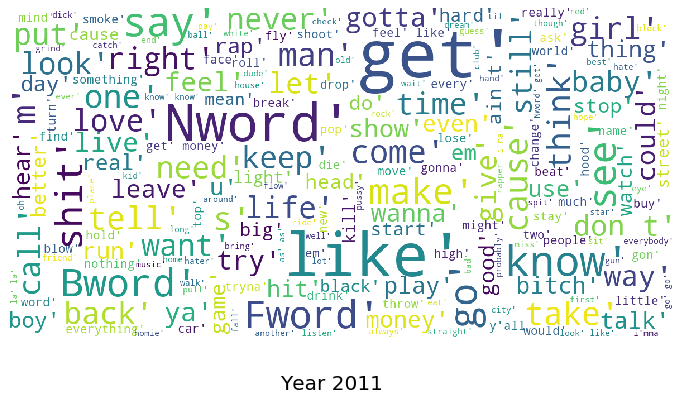

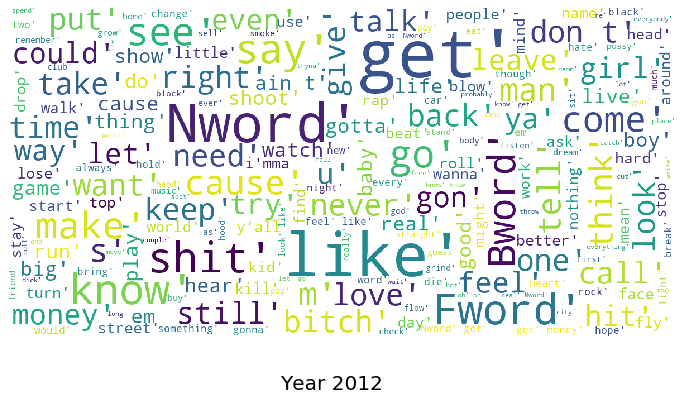

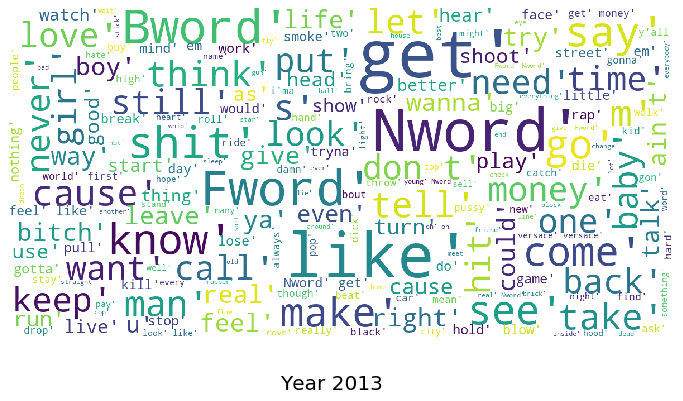

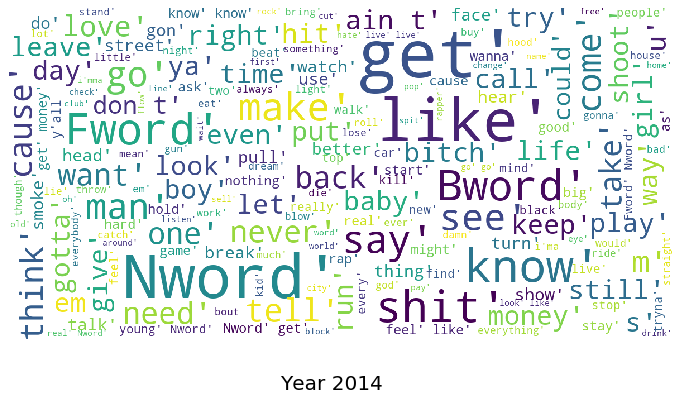

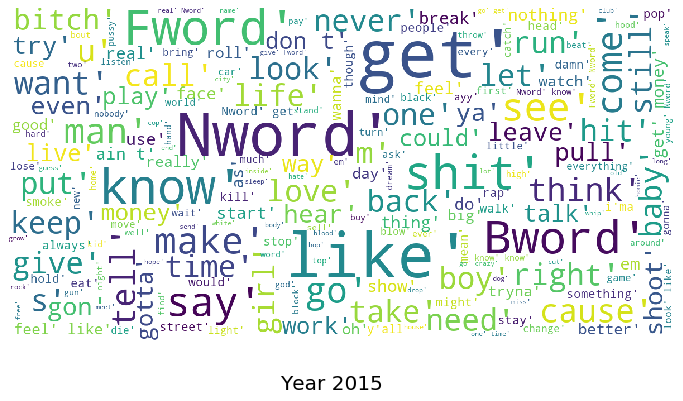

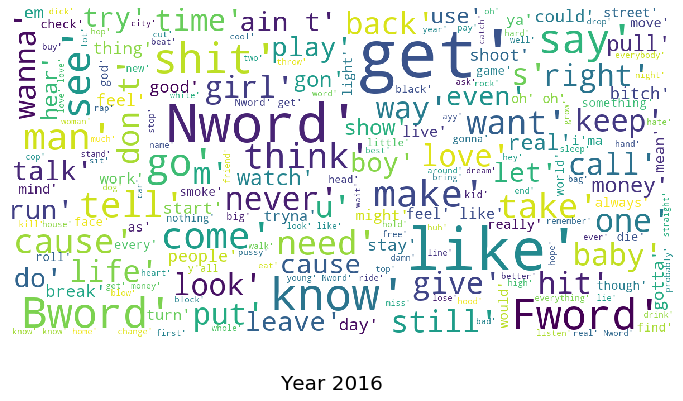

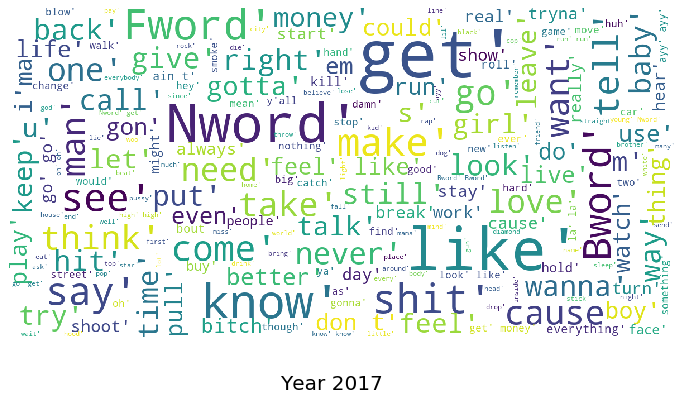

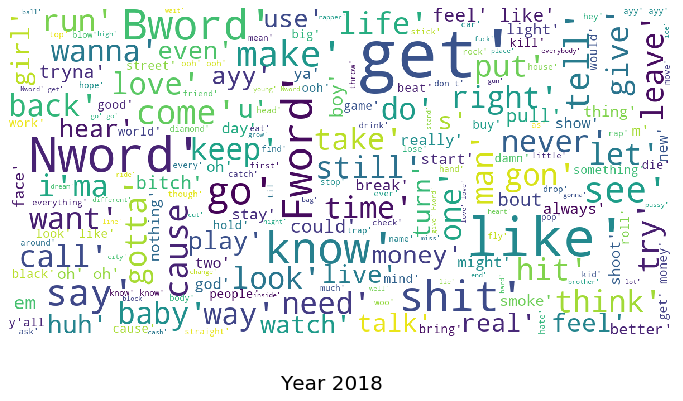

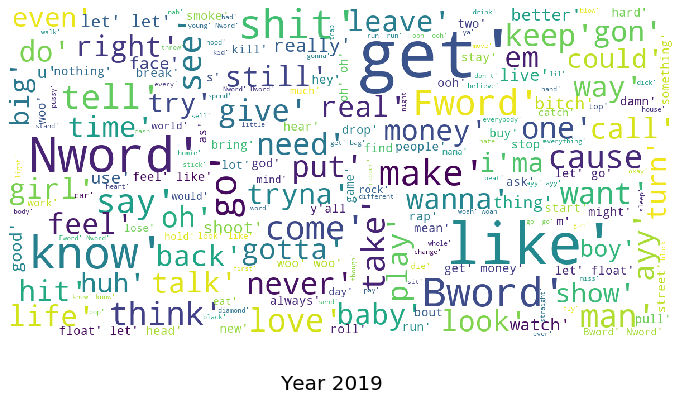

Empty DataFrame
Columns: []
Index: []

In [137]:
year_df.groupby('Year_release').apply(
    lambda x: show_wordcloud(x.tokens_no_stpw_lemma.tolist(), title=f"Year {x.name}")
)

In [ ]:
#words frequency per year

## EDA for the entire data

### Features engineering

In [139]:
tracks_df.head()

Artist               Title  \
1  DJ Jazzy Jeff & The Fresh Prince       Time to Chill   
3                 Machine Gun Kelly               Candy   
4                           Big Pun  You Ain’t a Killer   
6                           Das EFX           Buck-Buck   
9                      Kool Moe Dee   To the Beat Y’all   

                         Album        Year  \
1  He’s The DJ, I’m The Rapper  1988-03-29   
3                 Hotel Diablo  2019-07-05   
4           Capital Punishment  1998-04-28   
6                 Hold It Down  1995-09-26   
9           Funke Funke Wisdom  1991-06-11   

                                              Lyrics  \
1  [Fresh Prince]\nFor years I have been waitin a...   
3  [Intro: Trippie Redd]\nHaha, Big 14, you know ...   
4  [Verse 1]\nThe harsh realities of life have ta...   
6  *Skoob and Dray giving shoutouts*\n\nChorus:\n...   
9  To the beat...\n\n(To the beat y'all\nTo the b...   

                         name duration_ms popularity num_markets  \
1               Time to Chill      266040         24          79   
3  Candy (feat. Trippie Redd)      156719         78          79   
4          You Ain't a Killer      254866         57          79   
6                   Buck-Buck      193626         22          78   
9           To The Beat Y'All      201266         11          77   

                                   album  ... acousticness instrumentalness  \
1            He's The DJ, I'm The Rapper  ...      0.00172         0.000020   
3                           Hotel Diablo  ...      0.00829         0.000000   
4  Capital Punishment (Explicit Version)  ...      0.13400         0.000000   
6                           Hold It Down  ...      0.29300         0.000000   
9                    Funke, Funke Wisdom  ...      0.01930         0.000107   

  liveness valence    tempo  time_signature  Year_release  \
1   0.0648   0.887  170.385               4          1988   
3   0.1820   0.480   98.019               4          2019   
4   0.1120   0.745   90.945               4          1998   
6   0.2950   0.531   95.677               4          1995   
9   0.3950   0.578  108.597               4          1991   

                                      Cleaned_lyrics  \
1  for years i have been waitin and hesitatin to ...   
3  haha big 14 you know what the fuck going on   ...   
4  the harsh realities of life have taken toll ev...   
6  skoob and dray giving shoutouts  chorus  well ...   
9  to the beat  to the beat y'all to the beat y'a...   

                                         Lyric_words Language  
1  [for, years, i, have, been, waitin, and, hesit...       en  
3  [haha, big, 14, you, know, what, the, fuck, go...       en  
4  [the, harsh, realities, of, life, have, taken,...       en  
6  [skoob, and, dray, giving, shoutouts, chorus, ...       en  
9  [to, the, beat, to, the, beat, y'all, to, the,...       en  

[5 rows x 31 columns]

In [140]:
tracks_df.columns

Index(['Artist', 'Title', 'Album', 'Year', 'Lyrics', 'name', 'duration_ms',
       'popularity', 'num_markets', 'album', 'disc_number', 'is_explicit',
       'track_number', 'release_date', 'artist', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'Year_release', 'Cleaned_lyrics', 'Lyric_words', 'Language'],
      dtype='object')

In [143]:
#Selecting the features that I need going forward
df = tracks_df[['Artist','Title', 'Album','duration_ms','popularity', 
               'num_markets','danceability', 'energy', 'loudness', 
               'speechiness', 'acousticness','instrumentalness', 'liveness', 'valence', 
               'tempo', 'time_signature','Year_release','Cleaned_lyrics']].reset_index(drop=True)

In [144]:
df.head()

Artist               Title  \
0  DJ Jazzy Jeff & The Fresh Prince       Time to Chill   
1                 Machine Gun Kelly               Candy   
2                           Big Pun  You Ain’t a Killer   
3                           Das EFX           Buck-Buck   
4                      Kool Moe Dee   To the Beat Y’all   

                         Album duration_ms popularity num_markets  \
0  He’s The DJ, I’m The Rapper      266040         24          79   
1                 Hotel Diablo      156719         78          79   
2           Capital Punishment      254866         57          79   
3                 Hold It Down      193626         22          78   
4           Funke Funke Wisdom      201266         11          77   

   danceability  energy  loudness  speechiness  acousticness  \
0         0.735   0.559   -16.289        0.161       0.00172   
1         0.744   0.638    -4.860        0.049       0.00829   
2         0.724   0.887    -7.076        0.393       0.13400   
3         0.791   0.783   -10.470        0.416       0.29300   
4         0.801   0.481   -13.903        0.232       0.01930   

   instrumentalness  liveness  valence    tempo time_signature Year_release  \
0          0.000020    0.0648    0.887  170.385              4         1988   
1          0.000000    0.1820    0.480   98.019              4         2019   
2          0.000000    0.1120    0.745   90.945              4         1998   
3          0.000000    0.2950    0.531   95.677              4         1995   
4          0.000107    0.3950    0.578  108.597              4         1991   

                                      Cleaned_lyrics  
0  for years i have been waitin and hesitatin to ...  
1  haha big 14 you know what the fuck going on   ...  
2  the harsh realities of life have taken toll ev...  
3  skoob and dray giving shoutouts  chorus  well ...  
4  to the beat  to the beat y'all to the beat y'a...

In [145]:
df['duration_mins'] = df.duration_ms.apply(lambda x: round(float((x/(1000*60))%60),2))

In [146]:
df.head()

Artist               Title  \
0  DJ Jazzy Jeff & The Fresh Prince       Time to Chill   
1                 Machine Gun Kelly               Candy   
2                           Big Pun  You Ain’t a Killer   
3                           Das EFX           Buck-Buck   
4                      Kool Moe Dee   To the Beat Y’all   

                         Album duration_ms popularity num_markets  \
0  He’s The DJ, I’m The Rapper      266040         24          79   
1                 Hotel Diablo      156719         78          79   
2           Capital Punishment      254866         57          79   
3                 Hold It Down      193626         22          78   
4           Funke Funke Wisdom      201266         11          77   

   danceability  energy  loudness  speechiness  acousticness  \
0         0.735   0.559   -16.289        0.161       0.00172   
1         0.744   0.638    -4.860        0.049       0.00829   
2         0.724   0.887    -7.076        0.393       0.13400   
3         0.791   0.783   -10.470        0.416       0.29300   
4         0.801   0.481   -13.903        0.232       0.01930   

   instrumentalness  liveness  valence    tempo time_signature Year_release  \
0          0.000020    0.0648    0.887  170.385              4         1988   
1          0.000000    0.1820    0.480   98.019              4         2019   
2          0.000000    0.1120    0.745   90.945              4         1998   
3          0.000000    0.2950    0.531   95.677              4         1995   
4          0.000107    0.3950    0.578  108.597              4         1991   

                                      Cleaned_lyrics  duration_mins  
0  for years i have been waitin and hesitatin to ...           4.43  
1  haha big 14 you know what the fuck going on   ...           2.61  
2  the harsh realities of life have taken toll ev...           4.25  
3  skoob and dray giving shoutouts  chorus  well ...           3.23  
4  to the beat  to the beat y'all to the beat y'a...           3.35

In [147]:
#Create bag of words for each lyrics
df['tokens'] = df.Cleaned_lyrics.apply(lambda x: get_tokens(x,remove_stop_words=True))

In [148]:
#replace in' with ing
df['tokens'] = df.tokens.apply(lambda x: replace_contraction(x))

In [149]:
#Lemmatize verbs and nouns
df['tokens_lemma'] = df.tokens.apply(lambda x: lem_words(x,'n'))
df['tokens_lemma'] = df.tokens.apply(lambda x: lem_words(x,'v'))

In [150]:
df.head()

Artist               Title  \
0  DJ Jazzy Jeff & The Fresh Prince       Time to Chill   
1                 Machine Gun Kelly               Candy   
2                           Big Pun  You Ain’t a Killer   
3                           Das EFX           Buck-Buck   
4                      Kool Moe Dee   To the Beat Y’all   

                         Album duration_ms popularity num_markets  \
0  He’s The DJ, I’m The Rapper      266040         24          79   
1                 Hotel Diablo      156719         78          79   
2           Capital Punishment      254866         57          79   
3                 Hold It Down      193626         22          78   
4           Funke Funke Wisdom      201266         11          77   

   danceability  energy  loudness  speechiness  ...  instrumentalness  \
0         0.735   0.559   -16.289        0.161  ...          0.000020   
1         0.744   0.638    -4.860        0.049  ...          0.000000   
2         0.724   0.887    -7.076        0.393  ...          0.000000   
3         0.791   0.783   -10.470        0.416  ...          0.000000   
4         0.801   0.481   -13.903        0.232  ...          0.000107   

   liveness  valence    tempo  time_signature Year_release  \
0    0.0648    0.887  170.385               4         1988   
1    0.1820    0.480   98.019               4         2019   
2    0.1120    0.745   90.945               4         1998   
3    0.2950    0.531   95.677               4         1995   
4    0.3950    0.578  108.597               4         1991   

                                      Cleaned_lyrics duration_mins  \
0  for years i have been waitin and hesitatin to ...          4.43   
1  haha big 14 you know what the fuck going on   ...          2.61   
2  the harsh realities of life have taken toll ev...          4.25   
3  skoob and dray giving shoutouts  chorus  well ...          3.23   
4  to the beat  to the beat y'all to the beat y'a...          3.35   

                                              tokens  \
0  [years, waitin, hesitatin, make, rap, record, ...   
1  [haha, big, 14, know, Fword, going, ayy, know,...   
2  [harsh, realities, life, taken, toll, even, je...   
3  [skoob, dray, giving, shoutouts, chorus, well,...   
4  [beat, beat, y'all, beat, y'all, beat, y'all, ...   

                                        tokens_lemma  
0  [years, waitin, hesitatin, make, rap, record, ...  
1  [haha, big, 14, know, Fword, go, ayy, know, ke...  
2  [harsh, realities, life, take, toll, even, jes...  
3  [skoob, dray, give, shoutouts, chorus, well, g...  
4  [beat, beat, y'all, beat, y'all, beat, y'all, ...  

[5 rows x 21 columns]

In [151]:
#count of words per lyrics
df['Count_words'] = df.tokens_lemma.apply(lambda x: len(x))

In [160]:
#save data frame
with open('../Data-Cleaning-EDA/cleaned_full_data.pkl', 'wb') as file:
    pickle.dump(df, file)

### Graphs

In [154]:
df.describe()

danceability        energy      loudness   speechiness  acousticness  \
count  27514.000000  27514.000000  27514.000000  27514.000000  27514.000000   
mean       0.684572      0.691330     -7.033227      0.255748      0.159586   
std        0.144697      0.161633      3.131976      0.150408      0.196135   
min        0.000000      0.000020    -46.647000      0.000000      0.000000   
25%        0.588000      0.588000     -8.356750      0.137250      0.022800   
50%        0.701000      0.708000     -6.455000      0.257000      0.081100   
75%        0.794000      0.815000     -4.995000      0.344000      0.220000   
max        0.986000      0.998000      0.619000      0.965000      0.995000   

       instrumentalness      liveness       valence         tempo  \
count      27514.000000  27514.000000  27514.000000  27514.000000   
mean           0.015074      0.235380      0.529796    115.622967   
std            0.094996      0.181818      0.214184     31.965893   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.104000      0.374000     90.040000   
50%            0.000000      0.166500      0.544000    104.238000   
75%            0.000005      0.323000      0.694000    140.015750   
max            0.995000      0.986000      0.989000    228.078000   

       duration_mins   Count_words  
count   27514.000000  27514.000000  
mean        3.766491    289.411863  
std         1.136062    117.776477  
min         0.070000      0.000000  
25%         3.190000    219.000000  
50%         3.780000    285.000000  
75%         4.360000    357.000000  
max        24.550000   1611.000000

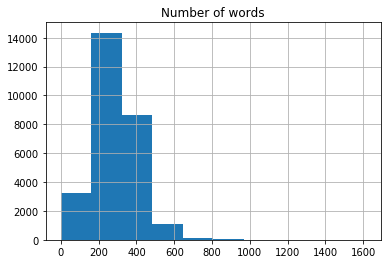

In [155]:
df.Count_words.hist()
plt.title('Number of words')
plt.show()

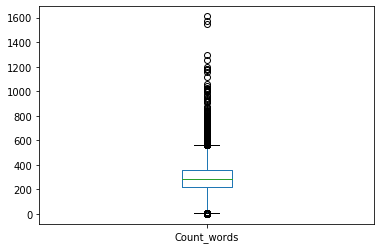

In [156]:
#looking at the box plot for outliers
df.Count_words.plot(kind='box')
plt.show()

In [157]:
#removing any row with no lyrics
df = df[df['Count_words'] > 25]

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27122 entries, 0 to 27513
Data columns (total 22 columns):
Artist              27122 non-null object
Title               27122 non-null object
Album               24815 non-null object
duration_ms         27122 non-null object
popularity          27122 non-null object
num_markets         27122 non-null object
danceability        27122 non-null float64
energy              27122 non-null float64
loudness            27122 non-null float64
speechiness         27122 non-null float64
acousticness        27122 non-null float64
instrumentalness    27122 non-null float64
liveness            27122 non-null float64
valence             27122 non-null float64
tempo               27122 non-null float64
time_signature      27122 non-null object
Year_release        21224 non-null object
Cleaned_lyrics      27122 non-null object
duration_mins       27122 non-null float64
tokens              27122 non-null object
tokens_lemma        27122 non-null object

In [159]:
df.describe()

danceability        energy      loudness   speechiness  acousticness  \
count  27122.000000  27122.000000  27122.000000  27122.000000  27122.000000   
mean       0.686212      0.693004     -6.983037      0.255796      0.157343   
std        0.142431      0.159656      3.050609      0.148809      0.192794   
min        0.000000      0.000020    -46.647000      0.000000      0.000000   
25%        0.589000      0.589000     -8.320750      0.139000      0.022700   
50%        0.702000      0.709000     -6.435000      0.257000      0.080400   
75%        0.794000      0.816000     -4.983000      0.344000      0.218000   
max        0.986000      0.998000      0.619000      0.965000      0.995000   

       instrumentalness      liveness       valence         tempo  \
count      27122.000000  27122.000000  27122.000000  27122.000000   
mean           0.013631      0.234751      0.530623    115.780910   
std            0.089636      0.181317      0.212989     31.749486   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.104000      0.375000     90.058000   
50%            0.000000      0.166000      0.544500    104.325000   
75%            0.000005      0.323000      0.694000    140.018000   
max            0.986000      0.986000      0.989000    228.078000   

       duration_mins   Count_words  
count   27122.000000  27122.000000  
mean        3.789875    293.399823  
std         1.112468    113.819265  
min         0.080000     26.000000  
25%         3.210000    222.000000  
50%         3.790000    287.000000  
75%         4.370000    359.000000  
max        24.550000   1611.000000

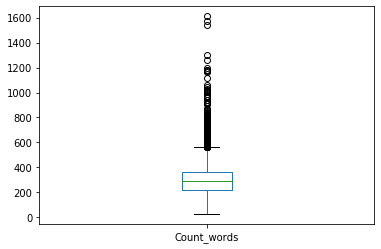

In [161]:
#Checking boxplot
df.Count_words.plot(kind='box')
plt.show()

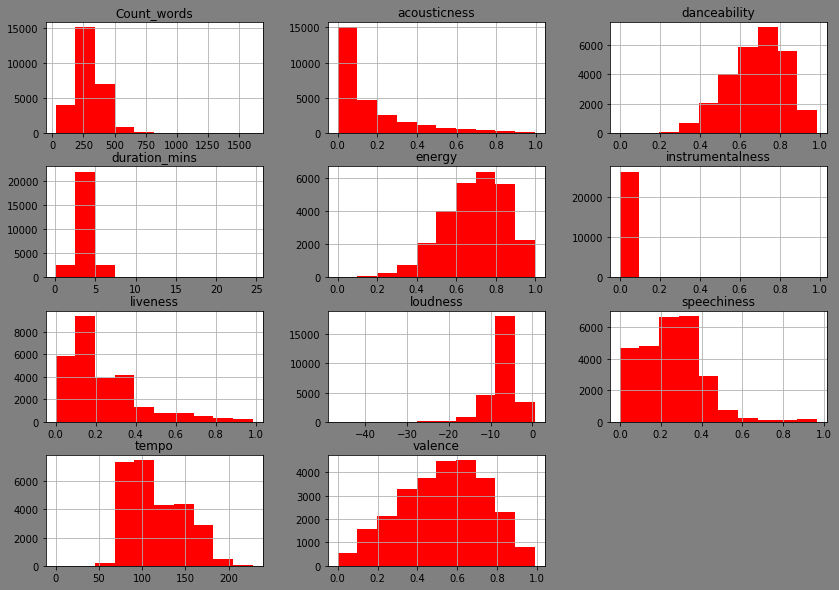

In [166]:
#evaluating all answers for the features to find out if more cleaning needed
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (14,10),facecolor='grey')
ax = fig.gca()
df.hist(ax = ax,color='r');

EXPLAIN THE SPOTIFY RESULT IN LINE WITH DEFINITION
acousticness --> A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

danceability --> Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

energy --> Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

instrumentalness --> Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

liveness --> Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

loudness --> The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

speechiness --> 	Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

tempo --> The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

time_signature --> 	An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

valence --> A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


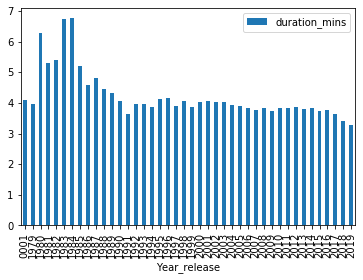

In [168]:
pd.DataFrame(df.groupby('Year_release')['duration_mins'].mean()).plot(kind='bar')

In [169]:
df.columns

Index(['Artist', 'Title', 'Album', 'duration_ms', 'popularity', 'num_markets',
       'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'Year_release', 'Cleaned_lyrics', 'duration_mins', 'tokens',
       'tokens_lemma', 'Count_words'],
      dtype='object')

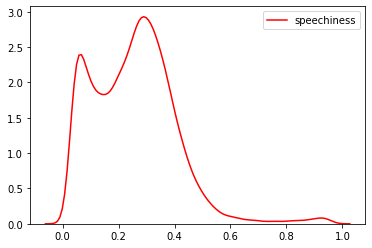

In [170]:
#density of speechiness as not clear in above
sns.kdeplot(df.speechiness, color = 'r')
plt.show()

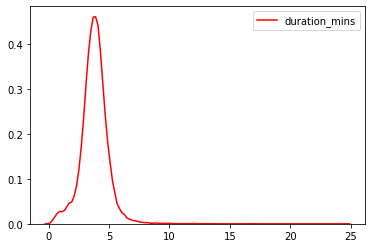

In [172]:
#Looking at the different distribution
sns.kdeplot(df.duration_mins, color = 'r')
plt.show()

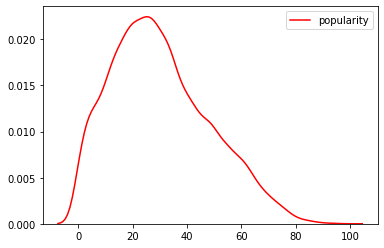

In [173]:
sns.kdeplot(df.popularity, color = 'r')
plt.show()

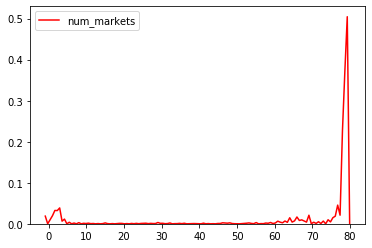

In [174]:
sns.kdeplot(df.num_markets, color = 'r')
plt.show()

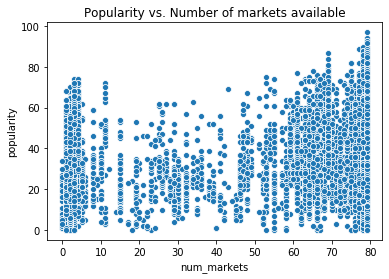

In [175]:
sns.scatterplot(df.num_markets, df.popularity)
plt.title('Popularity vs. Number of markets available',fontsize=12)
plt.show()

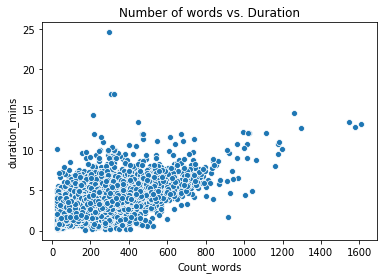

In [177]:
sns.scatterplot(df.Count_words, df.duration_mins)
plt.title('Number of words vs. Duration',fontsize=12)
plt.show()

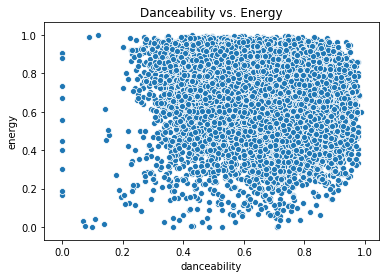

In [178]:
sns.scatterplot(df.danceability, df.energy)
plt.title('Danceability vs. Energy',fontsize=12)
plt.show()

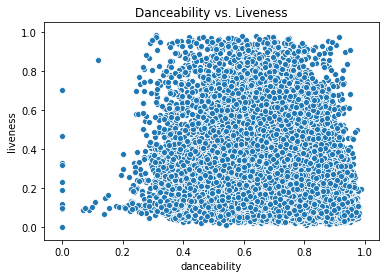

In [179]:
sns.scatterplot(df.danceability, df.liveness)
plt.title('Danceability vs. Liveness',fontsize=12)
plt.show()

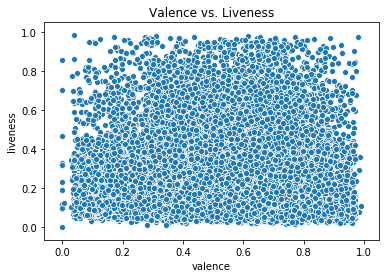

In [180]:
sns.scatterplot(df.valence, df.liveness)
plt.title('Valence vs. Liveness',fontsize=12)
plt.show()

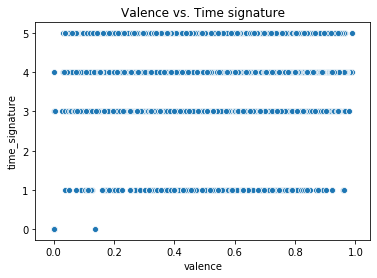

In [181]:
sns.scatterplot(df.valence, df.time_signature)
plt.title('Valence vs. Time signature',fontsize=12)
plt.show()

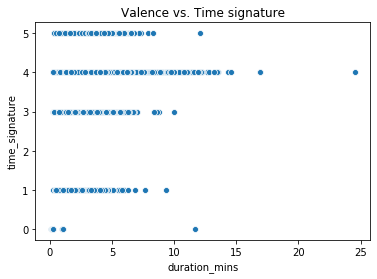

In [183]:
sns.scatterplot(df.duration_mins, df.time_signature)
plt.title('Valence vs. Time signature',fontsize=12)
plt.show()

In [ ]:
df.columns

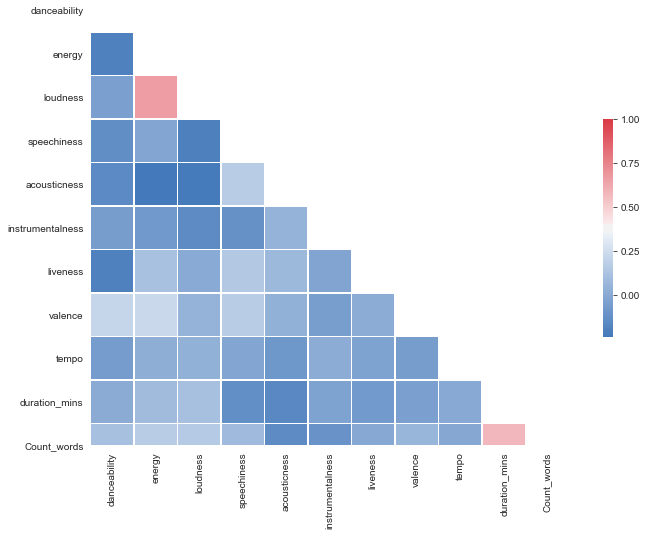

In [186]:
CorrMtx(pd.DataFrame(df[['popularity',
       'num_markets','danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'duration_mins',
       'Count_words']]).corr(),dropDuplicates = True)